<a href="https://colab.research.google.com/github/lauren-kirsh/Data-Science-Portfolio/blob/main/HW3_DS_UA_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RDS Homework 3 Template
## Spring 2021


In [ ]:
!pip install shap

In [ ]:
from __future__ import print_function

import shap
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import sklearn.ensemble
import sklearn.metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import tqdm
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import fetch_20newsgroups
from collections import defaultdict
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
import seaborn as sns

# Configs
np.random.seed(1)
shap.initjs()
sns.set_style("whitegrid")

plot_shap=True # NOTE: Turn False to disable shap plots as they can be slow to load 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Problem 3

### Part (A)

Use the provided Colab template notebook to import the 20 newsgroups dataset from sklearn.datasets, importing the same two-class subset as was used in the LIME paper: Atheism and Christianity. Use the provided code to fetch the data, split it into training and test sets, then fit a TF-IDF vectorizer to the data, and train a SGDClassifier classifier.

In [ ]:
# Mark the categories of interest
categories = ['alt.atheism', 'soc.religion.christian']

# Fetch the data
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories)

# Set outcome class names
class_names = ['atheism', 'christian']

In [ ]:
# Split into train and test sets
y_train = newsgroups_train.target
train = newsgroups_train.data
y_test = newsgroups_test.target
test = newsgroups_test.data

In [ ]:
# Initialize & fit tf-idf vectorizer
vectorizer = TfidfVectorizer() # feature selection method
X_train = vectorizer.fit_transform(train)
X_test = vectorizer.transform(test)

In [ ]:
# Train & fit the classifier -- change to SGDClassifier
#model = sklearn.linear_model.LogisticRegression(penalty="l2", C=0.1)
#model.fit(X_train, y_train)
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

model = SGDClassifier(penalty = "l2", max_iter=100,loss = 'modified_huber')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### Part (B)

Generate a confusion matrix (hint: use sklearn.metrics.confusion_matrix) to evaluate the accuracy of the classifier. The confusion matrix should contain a count of correct Christian, correct Atheist, incorrect Christian, and incorrect Atheist predictions. Use SHAP’s explainer to generate visual explanations for any 5 documents in the test set. The documents you select should include some correctly classified and some misclassified documents.

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_pred, normalize = 'true')
print(matrix)


[[0.87147335 0.12852665]
 [0.01507538 0.98492462]]


In [ ]:
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, normalize = 'true')
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])

In [ ]:
print_confusion_matrix(y_test, y_pred)

True positive =  0.8714733542319749
False positive =  0.12852664576802508
False negative =  0.01507537688442211
True negative =  0.9849246231155779


#### Explainer

In [ ]:
# Initialize the explainer and apply to test data

# Initialize the explainer
explainer = shap.LinearExplainer(model, X_train, feature_perturbation="interventional")
# Apply it to the test data
shap_values = explainer.shap_values(X_test)

The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


In [ ]:
# We need to provide the data in dense format, not sparse
X_test_array = X_test.toarray()

In [ ]:
# Select 5 documents in the test set for explanation
item1 = 94 
item2 = 99 
item3 = 151
item4 = 6 
item5 = 9

In [ ]:
# Visually explain 5 documents selected from the test set
shap.initjs()
idx = item1
print("Athetism" if y_test[idx] else "Christian", "Review:")
print(test[idx])
shap.force_plot(
    explainer.expected_value, shap_values[idx,:], X_test_array[idx,:],
    feature_names=vectorizer.get_feature_names()
)

Christian Review:
From: bobbe@vice (Robert Beauchaine;6086;59-323;LP=A;YAyG)
Subject: More Best of A.A
Lines: 164



			RAPTURE - OCTOBER 28, 1992

		WHAT TO DO IN CASE YOU MISS THE RAPTURE

I. STAY CALM AND DO NOT PANIC

	Your natural reaction once you realize what has just occurred is to
panic.  But to do so is absolutely useless now.  If you had wanted to get right
with God before the rapture, you could have, but you chose to wait.  Now your 
only chance is to stay on this earth and to endure to the end of the 
Tribulation.  "But he that shall endure unto the end, the same shall be 
saved." - Matthew 24:13

II. REALIZE YOU ARE NOW LIVING DURING THE GREAT TRIBULATION

	The Great Tribulation is a seven year period starting from the time of
the rapture until Christ's second coming.  Also know as "the time of Jacob's
(Israel's) trouble" (Jere 30:7) and "Daniel's Seventieth Week" (Dan 9), this 
period will be unparalleled in trouble and horror.

III. GATHER AS MANY BIBLES AS YOU CAN AND 

In [ ]:
shap.initjs()
idx = item2
print("Athetism" if y_test[idx] else "Christian", "Review:")
print(test[idx])
shap.force_plot(
    explainer.expected_value, shap_values[idx,:], X_test_array[idx,:],
    feature_names=vectorizer.get_feature_names()
)

Christian Review:
From: jgreen@trumpet.calpoly.edu (James Thomas Green)
Subject: Re: "So help you God" in court?
Organization: California Polytechnic State University, San Luis Obispo
Lines: 11


I've heard that in California they ask you to swear without any
mention of a god.  What states actually include "god" in the
courtroom oath?



/~~~(-: James T. Green :-)~~~~(-: jgreen@oboe.calpoly.edu :-)~~~\ 
|  "At all times and in all nations,                            |
|     the priest has been hostile to liberty."                  |
|                               <Thomas Jefferson>              |



In [ ]:
shap.initjs()
idx = item3
print("Athetism" if y_test[idx] else "Christian", "Review:")
print(test[idx])
shap.force_plot(
    explainer.expected_value, shap_values[idx,:], X_test_array[idx,:],
    feature_names=vectorizer.get_feature_names()
)

Athetism Review:
From: torsina@enuxhb.eas.asu.edu (Who???????)
Subject: Islam = Satanic ???
Organization: Arizona State University
Lines: 80

Dear fellow Christians,  

	I had a dinner last night with a bible study group which      
I am in. We had a discussion about the difference between Christianity
and Islam. And I was shocked to hear that our bible study teacher
said that Mohammad was indeed a prophet but of Satan. I said, "What??"
I did not believe that, because I have some moslem friends who are
so kind and  nice, even sometimes I feel I wish I could be like them
(in my point of view, they don't sin as much as I do). How come if they
were under Satan, they could have such personalities. 

To tell you the truth, I don't know much about Islam.
But I know that they believe in God, they believe in the day of
judgement.
	
	Now I'm  asking you what your opinions about Islam and 
its teaching. 

IMPORTANT : I do not want to discuss whether they are saved or not.
	    I do not want to d

In [ ]:
shap.initjs()
idx = item4
print("Athetism" if y_test[idx] else "Christian", "Review:")
print(test[idx])
shap.force_plot(
    explainer.expected_value, shap_values[idx,:], X_test_array[idx,:],
    feature_names=vectorizer.get_feature_names()
)

Athetism Review:
From: revdak@netcom.com (D. Andrew Kille)
Subject: Re: Question about Virgin Mary
Organization: NETCOM On-line Communication Services (408 241-9760 guest)
Lines: 39

D. Andrew Byler (db7n+@andrew.cmu.edu) wrote:
: However greatly we extoll Mary, it is quite obvious that she is in no
: way God or even part of God or equal to God.  The Assumption of our
: Blessed Mother, meant that because of her close identification with the
: redemptive work of Christ, she was Assumed (note that she did not
: ASCEND) body and soul into Heaven, and is thus one of the few, along
: with Elijah, Enoch, Moses (maybe????) who are already perfected in
: Heaven.  Obviously, the Virgin Mary is far superior in glorification to
: any of the previously mentioned personages.


As I said, it is a provocative thought.

From "Answer to Job":

	The logical consistency of the papal declaration cannot be surpassed
	and it leaves Protestantism with the odium of being nothing but a
	_man's religion_ which 

In [ ]:
shap.initjs()
idx = item5
print("Athetism" if y_test[idx] else "Christian", "Review:")
print(test[idx])
shap.force_plot(
    explainer.expected_value, shap_values[idx,:], X_test_array[idx,:],
    feature_names=vectorizer.get_feature_names()
)

Christian Review:
From: mccullou@snake2.cs.wisc.edu (Mark McCullough)
Subject: Re: Amusing atheists and anarchists
Organization: University of Wisconsin, Madison -- Computer Sciences Dept.
Lines: 31

In article <timmbake.735294667@mcl> timmbake@mcl.ucsb.edu (Bake Timmons) writes:
>mccullou@whipple.cs.wisc.edu writes:
>
>>The line about atheists haveing something up their sleeves is what seemed
>>to imply that.  Sorry, been reading too much on the CLIPPER project lately,
>>and the paranoia over there may have seeped in some.
>
>;)  What is the CLIPPER project BTW?

The CLIPPER initiative is an announcement by Clinton that all the 
"secure" voice phones will use the same crypto chip, as a de-facto
government standard.  Problem is, the government is admitting that
they hold the keys to break the code easily, and the Justice department
will be using the keys to listen in on "illegal activities."  Many
people are really scared about such an initiative because it is
a major step towards outl

### Part (C)


#### Part (i)

In [ ]:
# Compute the accuracy of the classifier 
print("Accuracy of the classifier: ", sklearn.metrics.accuracy_score(model.predict(X_test), y_test))

Accuracy of the classifier:  0.9344490934449093


In [ ]:
# the number of misclassified documents
count = 0
miscalc_index = [] #list
misclassified_doc  = np.zeros(len(y_pred), dtype=bool)

for i in range(len(y_pred)):
  if(y_pred[i] != y_test[i]):
    count += 1
    miscalc_index.append(i)
    misclassified_doc[i] = True

print("Number of misclassified documents: ", count)
# print(miscalc_index)
# print(misclassified_doc)

Number of misclassified documents:  47


#### Part (ii)

In [ ]:
# Calculate conf_i for all misclassified documents 
predict = model.predict_proba(X_test)
predict.shape

conf_i = []
row = 0

for bool in misclassified_doc:
  if bool == True:
    calculation = abs(predict[row][0] - predict[row][1])
    conf_i.append(calculation)
  row += 1

# print(conf_i)

Text(0.5, 0, 'Magnitude')

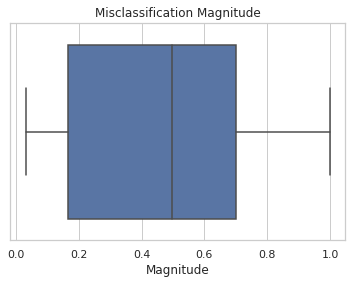

In [ ]:
# Plot conf_i
import  seaborn as sns
sns.set_theme(style = 'whitegrid')
ax = sns.boxplot(x=conf_i)
plt.title("Misclassification Magnitude")
plt.xlabel("Magnitude")

#### Part (iii)

In [ ]:
# Compute the number of documents (count_j) these words helped to misclassify
# Compute the sum of absolute SHAP values (weight_j) for each word_j
import operator

weight_j = defaultdict(float)
count_j = defaultdict(float)
atheist_weight = defaultdict(float)
christian_weight = defaultdict(float)

for j in miscalc_index:
  idx = j
  vals = shap_values[idx,:]
  feats = vectorizer.get_feature_names()

  if(y_pred[idx] == 0): # it was misclassified as Athetist but was Christian 
    for feat_i, val_i in zip(feats, vals):
      if val_i > 0:
        weight_j[feat_i] += abs(val_i)
        atheist_weight[feat_i] += abs(val_i)
        count_j[feat_i] += 1


  if(y_pred[idx] == 1): #it was misclassified as Christian but was Athetist 
    for feat_i, val_i in zip(feats, vals):
        if val_i < 0:
          weight_j[feat_i] += abs(val_i)
          christian_weight[feat_i] += abs(val_i)
          count_j[feat_i] += 1


In [ ]:
list(sorted(atheist_weight.items(), key=operator.itemgetter(1), reverse=True))[:]

[('rutgers', 0.3578828774910928),
 ('may', 0.2679578939814283),
 ('christian', 0.246879866051566),
 ('my', 0.2406176865626406),
 ('1993', 0.2350824806331042),
 ('athos', 0.23459917424251073),
 ('keith', 0.2193198054733139),
 ('why', 0.2139042506187463),
 ('you', 0.20854858278365807),
 ('islamic', 0.2066997236758778),
 ('me', 0.19967163068957555),
 ('am', 0.1958923068338826),
 ('is', 0.18009628891749782),
 ('islam', 0.1545410560813511),
 ('com', 0.15033240863282002),
 ('proof', 0.14948457848133512),
 ('christians', 0.14807843518862246),
 ('their', 0.1431389244693006),
 ('nntp', 0.14019747581334804),
 ('host', 0.13979688614403396),
 ('mathew', 0.12444794192900864),
 ('umd', 0.1115524592164069),
 ('god', 0.10971269622438175),
 ('posting', 0.10598201969364826),
 ('values', 0.10473839943111793),
 ('to', 0.10166251008518823),
 ('not', 0.10076532425354476),
 ('know', 0.09925370323162697),
 ('scripture', 0.09730858466291817),
 ('mangoe', 0.09251153177459433),
 ('cornell', 0.09022742911558748),

In [ ]:
list(sorted(christian_weight.items(), key=operator.itemgetter(1), reverse=True))[:]

[('you', 3.4408820818129118),
 ('church', 1.626264476844829),
 ('god', 1.4246606255417513),
 ('is', 1.3094755998481116),
 ('edu', 1.2124939730892292),
 ('nntp', 1.2090921951668105),
 ('host', 1.1594951266569375),
 ('cs', 1.0535747855892446),
 ('posting', 1.0046966907696944),
 ('hell', 0.9502230515366193),
 ('rolfe', 0.9336125872380756),
 ('and', 0.7423662301367016),
 ('christians', 0.7177955878664412),
 ('rutgers', 0.7169644841738044),
 ('am', 0.6091158222712543),
 ('dan', 0.5821564430663606),
 ('science', 0.5790594470835151),
 ('newsreader', 0.5613961630753115),
 ('may', 0.5471617284722367),
 ('this', 0.5410409416942661),
 ('1993', 0.5368990708549801),
 ('morality', 0.5250434502755543),
 ('it', 0.5229637424185672),
 ('arrogance', 0.5207706729122198),
 ('christ', 0.5171725262355109),
 ('his', 0.5090142584048342),
 ('don', 0.49989487871189825),
 ('group', 0.48551270585485967),
 ('com', 0.4804886958515347),
 ('to', 0.47446892263341306),
 ('scripture', 0.4702647601950137),
 ('who', 0.4670

In [ ]:
# Identify tokens (word_j) that contributed to the misclassification of documents
list(sorted(weight_j.items(), key=operator.itemgetter(1), reverse=True))[:]

[('you', 3.6494306645965695),
 ('church', 1.626264476844829),
 ('god', 1.5343733217661333),
 ('is', 1.4895718887656093),
 ('nntp', 1.3492896709801585),
 ('host', 1.2992920128009715),
 ('edu', 1.2288287582950574),
 ('posting', 1.1106787104633424),
 ('cs', 1.0968895864137658),
 ('rutgers', 1.074847361664897),
 ('hell', 0.9502230515366193),
 ('rolfe', 0.9336125872380756),
 ('christians', 0.8658740230550633),
 ('and', 0.8183957614058313),
 ('may', 0.8151196224536651),
 ('am', 0.8050081291051365),
 ('1993', 0.7719815514880838),
 ('christian', 0.7134096370320908),
 ('athos', 0.6373860071290666),
 ('my', 0.6344000010009546),
 ('com', 0.6308211044843547),
 ('why', 0.6227141548290165),
 ('science', 0.6131800113883354),
 ('this', 0.6087528126393279),
 ('dan', 0.589840959925108),
 ('newsreader', 0.5772739908823865),
 ('to', 0.5761314327186013),
 ('it', 0.5751242898291307),
 ('morality', 0.5739061411296449),
 ('scripture', 0.5675733448579319),
 ('know', 0.5378908622961506),
 ('arrogance', 0.536424

In [ ]:
# convert count_j into a numpy array with value (not keys) to plot
print(count_j)
count_data = list(count_j.items())
count = np. array(count_data)
count_array = np.zeros((len(count)))

for i in range(len(count)):
  count_array[i] = count[i][1]

print(count_array)

defaultdict(<class 'float'>, {'00': 40.0, '01': 43.0, '02': 43.0, '03': 41.0, '0358': 41.0, '05': 43.0, '0510': 41.0, '0511': 41.0, '07': 42.0, '08': 40.0, '09': 41.0, '10': 37.0, '10101': 41.0, '1200': 40.0, '13': 37.0, '14': 39.0, '14556': 42.0, '152': 41.0, '16': 37.0, '16937': 41.0, '16957': 41.0, '17': 41.0, '18': 36.0, '1800': 41.0, '18669': 41.0, '19': 38.0, '1987': 41.0, '1992': 40.0, '1993': 44.0, '20': 34.0, '22': 39.0, '2231': 41.0, '224': 41.0, '226': 41.0, '23': 40.0, '24': 37.0, '245': 41.0, '25': 39.0, '26': 39.0, '27': 38.0, '28412': 41.0, '28510': 41.0, '28782': 41.0, '29279': 41.0, '2965': 41.0, '2nd': 40.0, '3042': 41.0, '30602': 41.0, '31': 39.0, '312': 41.0, '32': 38.0, '329': 41.0, '36': 40.0, '37': 41.0, '38': 39.0, '381': 41.0, '39': 42.0, '40': 37.0, '416': 41.0, '4352': 41.0, '45': 40.0, '46': 40.0, '49': 41.0, '4bc': 1.0, '51': 40.0, '510': 41.0, '512': 41.0, '52': 40.0, '522': 41.0, '542': 41.0, '5447': 41.0, '55': 39.0, '5556': 41.0, '57': 41.0, '58': 41.0,

In [ ]:
# convert weight_j into a numpy array with value (not keys) to plot
print(weight_j)
weight_data = list(weight_j.items())
weight = np. array(weight_data)
weight_array = np.zeros((len(weight)))

for i in range(len(weight)):
  weight_array[i] = weight[i][1]

print(weight_array)

defaultdict(<class 'float'>, {'00': 0.06222039137867006, '01': 0.10345251868068087, '02': 0.11664487522544115, '03': 0.05389307193104475, '0358': 0.010759382123265139, '05': 0.08762605067360348, '0510': 0.016154265204515, '0511': 0.006090358399749545, '07': 0.0036731932849714795, '08': 0.006865648721923354, '09': 0.08820902236804853, '10': 0.08488549581106865, '10101': 0.0019214384548729199, '1200': 0.0016075209540570802, '13': 0.22901709709241067, '14': 0.24763271111840954, '14556': 0.0019093163169027292, '152': 6.310813156139179e-05, '16': 0.1550253354665645, '16937': 0.000668552139069841, '16957': 0.005344303639397303, '17': 0.02411901348444793, '18': 0.02528842077946111, '1800': 0.01580836971789205, '18669': 0.00780969698657103, '19': 0.2563790891304727, '1987': 0.0016925535471339122, '1992': 0.0006175889369573257, '1993': 0.7719815514880838, '20': 0.03204986069105797, '22': 0.0016738198645075096, '2231': 0.016154265204515, '224': 0.0004147733694810438, '226': 0.0022610025090214424

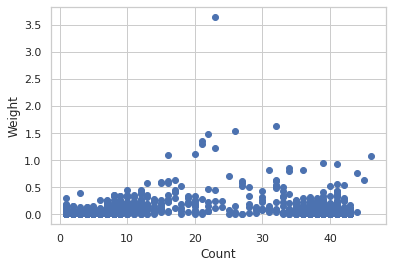

In [ ]:
# plot 
x = count_array
y = weight_array
plt.scatter(x, y)
plt.xlabel("Count")
plt.ylabel("Weight")
plt.show()

## Problem 4 (extra credit)

Implement a strategy for feature selection

Identify at least one example that was misclassified before feature selection and that is classified correctly after feature selection

In [ ]:
y_train = newsgroups_train.target
train = newsgroups_train.data
y_test = newsgroups_test.target
test = newsgroups_test.data

In [ ]:
# remove misclassification words of atheist 
def remove_atheist(sentence):
  words = sentence.split(' ')
  sentence = ' '
  for i in words:
    if i in atheist_weight.keys():
      continue
    else:
      sentence = (sentence + ' ' + i)
  return sentence

In [ ]:
# remove misclassification words of christian
def remove_christian(sentence):
  words = sentence.split(' ')
  sentence = '' 
  for i in words:
    if i in christian_weight.keys():
      continue
    else:
      sentence = (sentence + ' ' + i)
  return sentence

In [ ]:
# process train data
train_remove = []

for i in range(0,len(train)):
  sentence = train[i]
  choice = y_train[i]
  if(choice == 1):
    processed_sentence = remove_christian(sentence)
    train_remove.append(processed_sentence)
  else:
    processed_sentence = remove_atheist(sentence)
    train_remove.append(processed_sentence)

print(train_remove)

[' From: nigel.allen@canrem.com (Nigel Allen)\nSubject: scroll symposium 21-22\nLines: 96\n\n\n Library Congress Host Dead Sea Scroll Symposium April 21-22\n To: National Assignment desks, Daybook Editor\n Contact: John Sullivan, 202-707-9216, Lucy Suddreth, 202-707-9191\n          Library Congress\n\n   WASHINGTON, April  -- A symposium Dead Sea \nScrolls Library Congress Wednesday,\nApril 21, Thursday, April 22.  The two-day program, cosponsored\nby Baltimore Hebrew University, additional\nsupport Project Judaica Foundation, the\nlibrary\'s Mumford Room, floor, Madison Building.\n   Seating limited, admission session symposium\nmust requested (see Note A).\n   The symposium opening a\nmajor exhibition, "Scrolls Dead Sea: The Ancient Library of\nQumran Modern Scholarship," opens Library Congress\non April 29.  On fragmentary scrolls archaeological\nartifacts excavated Qumran, Israel Antiquities\nAuthority.  Approximately items Library Congress special\ncollections augment materials.  

In [ ]:
test_remove = []
for index in range(0,len(test)):
  sentence = test[index]
  choice = y_test[index]
  if(choice == 1):
    processed_sentence = remove_christian(sentence)
    test_remove.append(processed_sentence)
  else:
    processed_sentence = remove_atheist(sentence)
    test_remove.append(processed_sentence)

In [ ]:
# Initialize & fit tf-idf vectorizer
train_remove = np.array(train_remove)
test_remove = np.array(test_remove)
vectorizer = TfidfVectorizer() # feature selection method
X_train_removed = vectorizer.fit_transform(train_remove)
X_test_removed = vectorizer.transform(test_remove)

In [ ]:
model_removed = SGDClassifier(max_iter=100,loss = 'modified_huber')
model_removed.fit(X_train_removed, y_train)
y_pred_removed = model_removed.predict(X_test_removed)

In [ ]:
print_confusion_matrix(y_pred_removed, y_test)

True positive =  0.99
False positive =  0.01
False negative =  0.05275779376498801
True negative =  0.947242206235012


In [ ]:
# Compute the accuracy of the classifier 
print("Accuracy of the classifier: ", sklearn.metrics.accuracy_score(y_pred_removed, y_test))

Accuracy of the classifier:  0.9651324965132496


In [ ]:
# the number of misclassified documents
count = 0

for i in range(len(y_pred_removed)):
  if(y_pred_removed[i] != y_test[i]):
    count += 1

print("Number of misclassified documents: ", count)

Number of misclassified documents:  25


In [ ]:
# Initialize the explainer
explainer = shap.LinearExplainer(model_removed, X_train_removed, feature_perturbation="interventional")
# Apply it to the test data
shap_values = explainer.shap_values(X_test_removed)

The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


In [ ]:
# We need to provide the data in dense format, not sparse
X_test_array = X_test_removed.toarray()

In [ ]:
print(miscalc_index[0])

13


In [ ]:
shap.initjs()
idx = miscalc_index[0]
print("Athetism" if y_test[idx] else "Christian", "Review:")
print(test[idx])
shap.force_plot(
    explainer.expected_value, shap_values[idx,:], X_test_array[idx,:],
    feature_names=vectorizer.get_feature_names()
)

Christian Review:
From: livesey@solntze.wpd.sgi.com (Jon Livesey)
Subject: Re: Requests
Organization: sgi
Lines: 28
Distribution: world
NNTP-Posting-Host: solntze.wpd.sgi.com

In article <C5qLLG.4BC@mailer.cc.fsu.edu>, mayne@pipe.cs.fsu.edu (William Mayne) writes:
|> In article <pww-190493085759@spac-at1-59.rice.edu> pww@spacsun.rice.edu (Peter Walker) writes:
|> >
|> >Didn't the Church get lightning rods banned in several European countries
|> >in the eighteenth century because it was widely believed that they
|> >interfered with god's striking down of blasphemers? I seem to remember that
|> >this was more common in eastern Europe.
|> 
|> I don't know about eastern Europe, but according to Bertrand Russell,
|> writing in Science and Mysticism (I think, though it could have been
|> another book) said that preachers in colonial Boston attributed an
|> earthquake to God's wrath over people putting up lightning rods, which
|> they had been preaching against as interference with God's will